In [47]:

import warnings
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

from datetime import datetime
import re










# Analysis of tweets from City Year handles, who sent the most-favorited tweets, ranking of number of followers

-- tweets are from late 2016 to late Sept 2018, and were obtained from twitter api for free,  so twitter doesnt guarantee completeness like it does for paid access

In [48]:

allDF = pd.read_csv ("tweets_until_late_Sept.csv") 
#csv created from from using squlite and python twitter api access code published as open source code on curiositybits.com 


In [49]:
allDF.columns

Index([u'rowid', u'query', u'user_type', u'tweet_id', u'inserted_date',
       u'truncated', u'language', u'possibly_sensitive', u'coordinates',
       u'retweeted_status', u'withheld_in_countries', u'withheld_scope',
       u'created_at_text', u'created_at', u'month', u'year', u'content',
       u'from_user_screen_name', u'from_user_followers_count',
       u'from_user_friends_count', u'from_user_listed_count',
       u'from_user_favourites_count', u'from_user_statuses_count',
       u'from_user_description', u'from_user_location',
       u'from_user_created_at', u'retweet_count', u'favorite_count',
       u'entities_urls', u'entities_urls_count', u'entities_hashtags',
       u'entities_hashtags_count', u'entities_mentions',
       u'entities_mentions_count', u'in_reply_to_screen_name',
       u'in_reply_to_status_id', u'source', u'entities_expanded_urls',
       u'json_output', u'entities_media_count', u'media_expanded_url',
       u'media_url', u'media_type', u'video_link', u'photo_

In [50]:
newDF = allDF

In [51]:

#get rid of retweets, ie only content created by a city year handle not stuff handles retweeted from other sources

newDF = allDF[allDF["retweeted_status"].isnull()] #.dropna(axis=1)




In [52]:
columns = ['rowid',
 'query',
 'user_type',
 'inserted_date',
 'truncated',
 'language',
 'possibly_sensitive',
 'retweeted_status',
 'withheld_in_countries',
 'withheld_scope',
 'created_at',
 'from_user_listed_count',
 'from_user_favourites_count',
 'from_user_statuses_count',
 'from_user_description',
 'from_user_location',
 'from_user_created_at',
 'entities_urls',
 'entities_urls_count',
 'entities_hashtags',
 'entities_hashtags_count',
 'entities_mentions',
 'entities_mentions_count',
 'in_reply_to_screen_name',
 'in_reply_to_status_id',
 'source',
 'entities_expanded_urls',
 'json_output',
 'media_url',
 'video_link',
 'photo_link',
 'twitpic',
 'num_characters',
 'num_words',
'coordinates',
           'entities_media_count',
           'media_expanded_url',
           'media_type'
           
          ]
newDF.drop(columns, inplace=True, axis=1)




In [53]:
timestamps = pd.to_datetime(newDF['created_at_text'], errors='coerce')

In [54]:
newDF["timestamp"] = pd.Series(timestamps, index = allDF.index)  



/Users/hw/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [55]:
max(newDF.timestamp)

Timestamp('2018-09-25 17:33:23')

In [56]:
min(newDF.timestamp)

Timestamp('2014-04-21 20:43:05')

In [57]:
list(newDF)

['tweet_id',
 'created_at_text',
 'month',
 'year',
 'content',
 'from_user_screen_name',
 'from_user_followers_count',
 'from_user_friends_count',
 'retweet_count',
 'favorite_count',
 'timestamp']

In [58]:
followers = newDF[['from_user_screen_name', 'from_user_followers_count', 'timestamp']].copy()


In [59]:

groupedFollowers = followers.groupby('from_user_screen_name', as_index=False).max()

In [60]:
#sort by followers count
groupedFollowers = groupedFollowers.sort_values(by="from_user_followers_count",ascending=False)


## Rank City Year twitter handles by follower count

In [61]:
#get rid of extra column and make a graph
graphFollowers = groupedFollowers.drop('timestamp', 1)

graphFollowers

from_user_screen_name  from_user_followers_count
2               CityYear                      31711
12            CityYearLA                      15001
4         CityYearBoston                       7320
7             CityYearDC                       5430
25            CityYearUK                       5201
15         CityYearMiami                       5102
18       CityYearNewYork                       4821
21        CityYearPhilly                       4321
6        CityYearChicago                       4047
13           CityYearMKE                       3951
23       CityYearSeattle                       3026
5            CityYearCLE                       2988
20           CityYearPVD                       2636
1              CareForce                       2583
9        CityYearDetroit                       2237
19       CityYearOrlando                       2218
16            CityYearNH                       2041
3             CityYearBR                       1764
10           CityYearJAX                       1742
24         CityYearTulsa                       1663
8         CityYearDenver                       1611
22           CityYearSAC                       1458
17          CityYearNOLA                       1430
11            CityYearKC                       1083
14       CityYearMemphis                        553
26         CityYear_NOLA                        192
0               CYSA_MLK                         64

In [62]:
#change column names
graphFollowers.columns = ['twitter_handle', 'followers']

## Graph City Year twitter handles by follower count

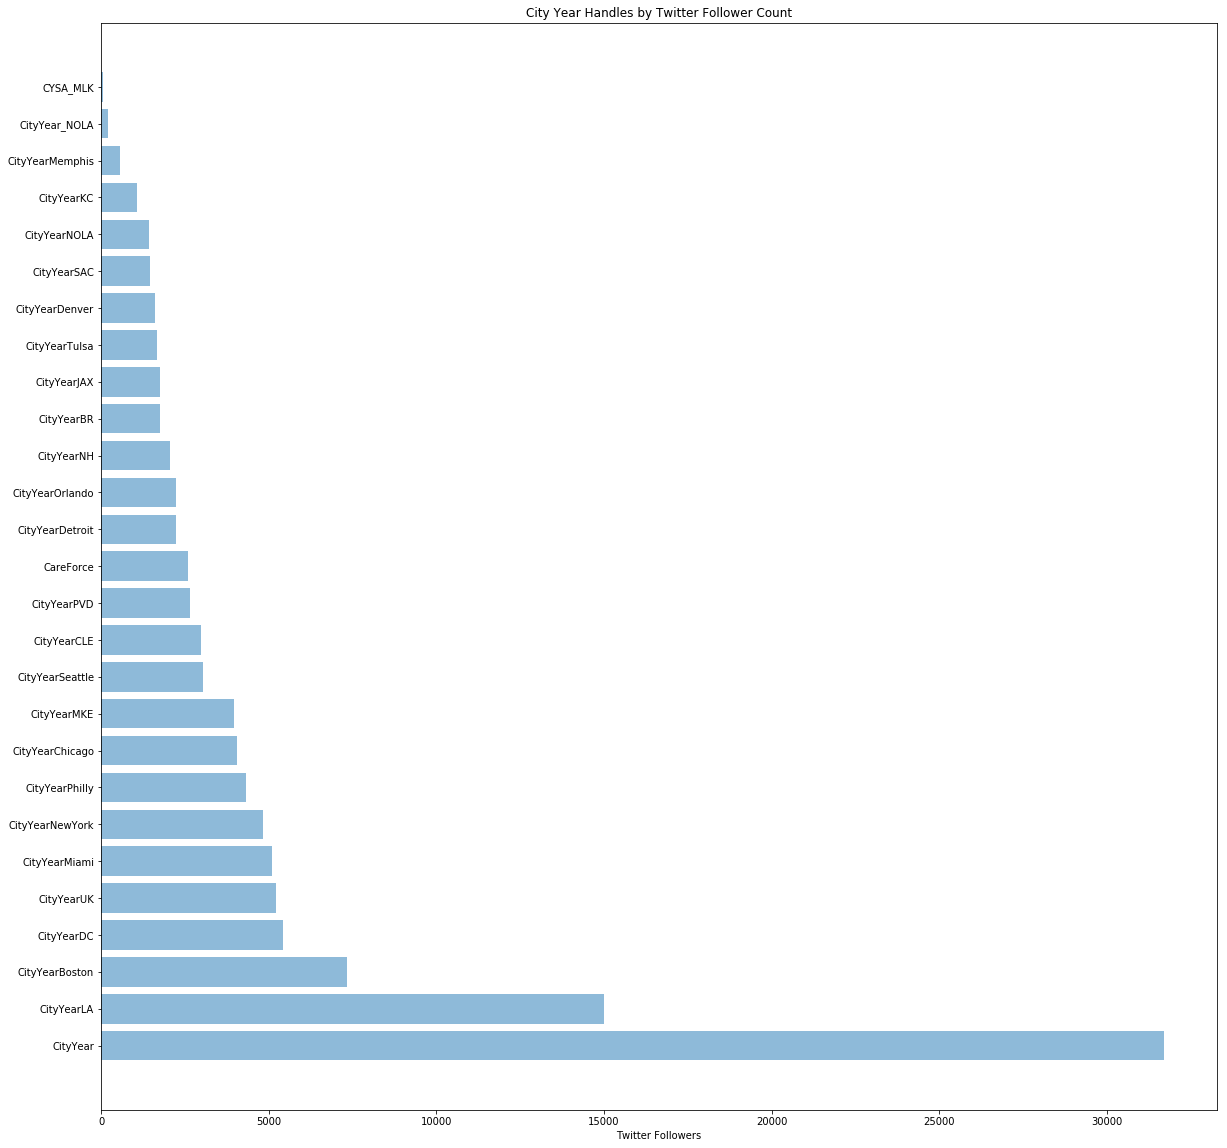

In [63]:
objects = graphFollowers.twitter_handle
y_pos = np.arange(len(objects))
performance = graphFollowers.followers
plt.figure(figsize=(20,20)) #figure size 
plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Twitter Followers')
plt.title('City Year Handles by Twitter Follower Count')

plt.show()

In [64]:
liked = newDF[['from_user_screen_name', 'favorite_count', 'timestamp']].copy()
#liked.head()



In [65]:

groupedLiked = liked.groupby('from_user_screen_name', as_index=False).max()

In [66]:
#sort by favorite count
groupedLiked = groupedLiked.sort_values(by="favorite_count",ascending=False)


In [67]:
#get rid of extra column and make a graph
graphLiked = groupedLiked.drop('timestamp', 1)

#graphLiked.head()

In [68]:
graphLiked.columns = ['twitter_handle', 'favorited count']

## Most tweet-likes for each handle, ie take all the tweets and likes and pick out the max likes for each handle on a tweet

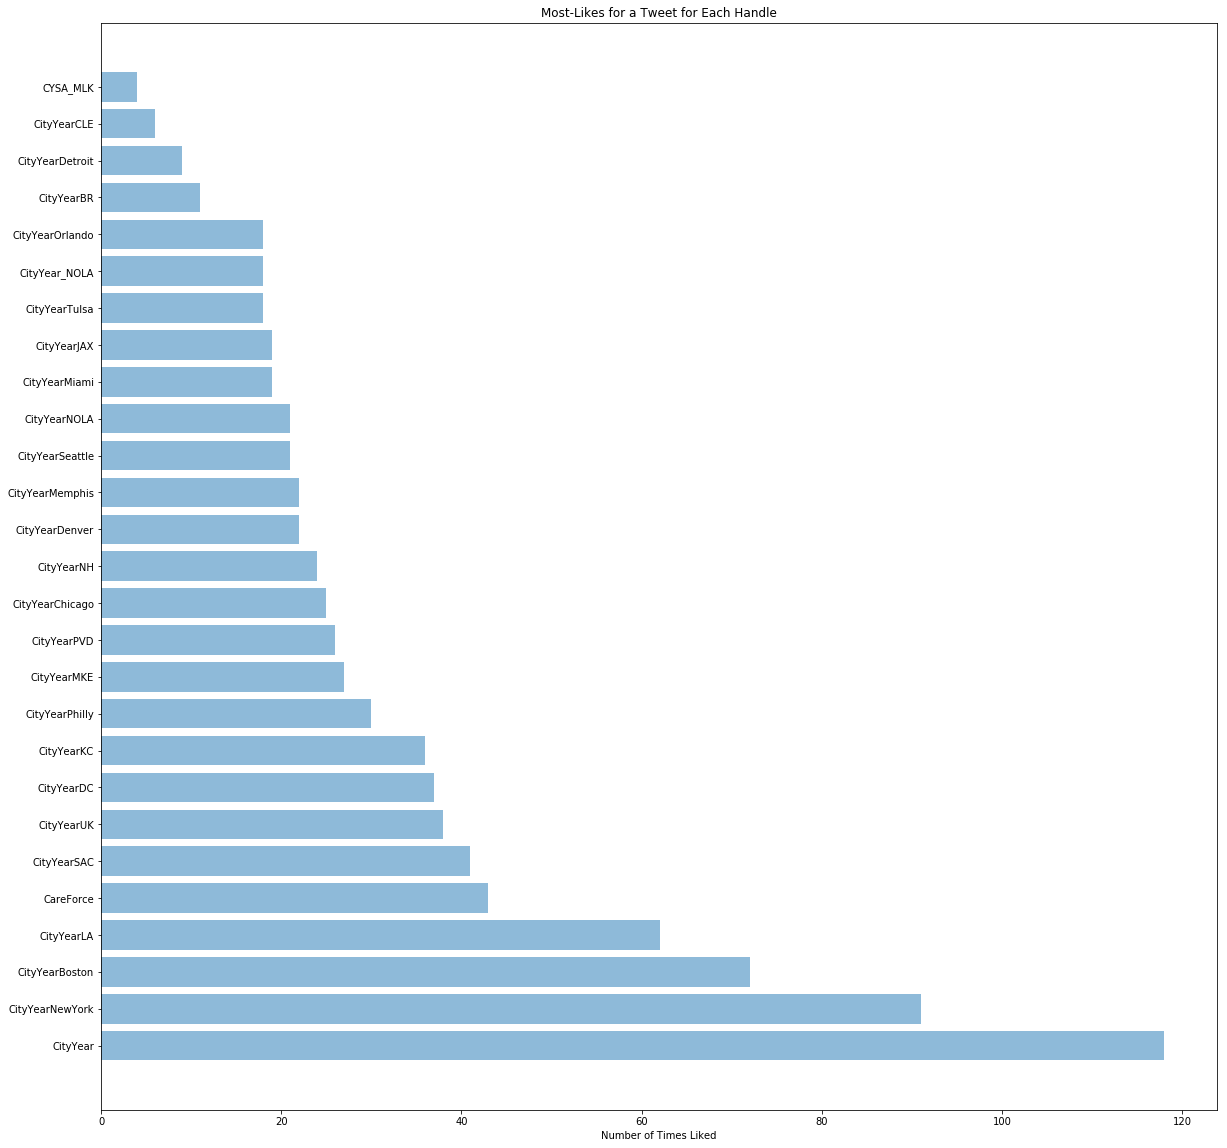

In [69]:
objects2 = graphLiked.twitter_handle
y_pos = np.arange(len(objects2))
performance2 = graphLiked['favorited count']
plt.figure(figsize=(20,20)) #figure size 
plt.barh(y_pos, performance2, align='center', alpha=0.5)
plt.yticks(y_pos, objects2)
plt.xlabel('Number of Times Liked')
plt.title('Most-Likes for a Tweet for Each Handle')
 
plt.show()

#  the top 10 tweeted across all the handles, ie who most often sends the top tweeted 

In [91]:

groupedMostLiked = liked.sort_values(by="favorite_count",ascending=False)
#there are 2383 entries, some are 0

In [92]:
#get rid of extra column and make a graph
groupedMostLiked = groupedMostLiked.drop('timestamp', 1)

In [88]:
groupedMostLiked.columns = ['twitter_handle', 'favorited count']
top10 = groupedMostLiked.head(10)

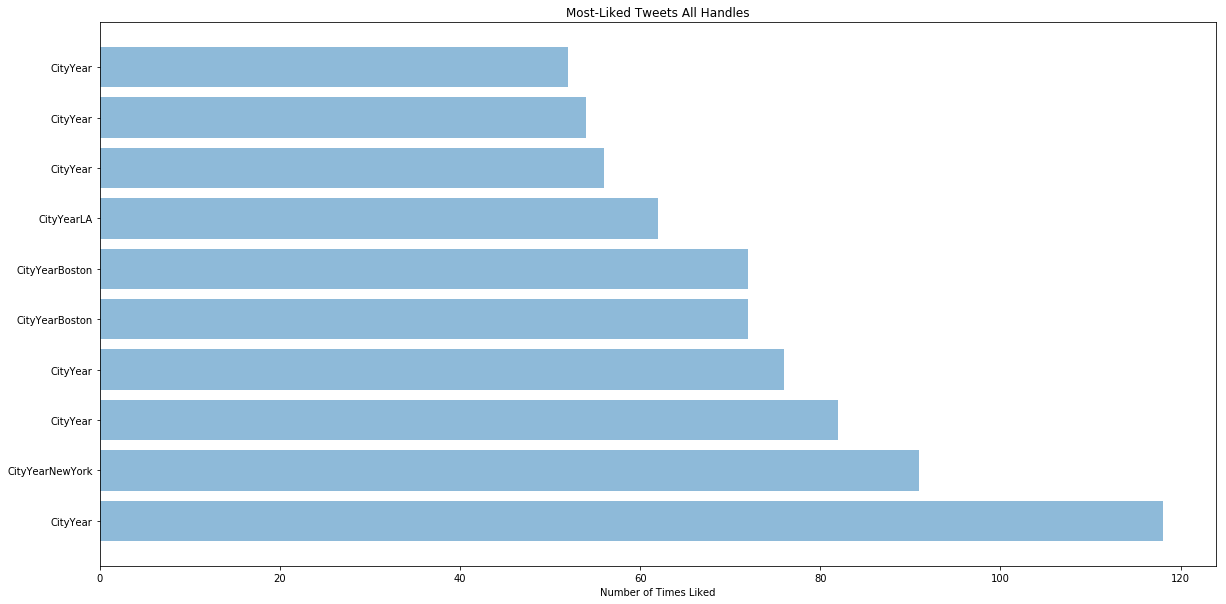

In [94]:
objects3 = top10.twitter_handle
y_pos = np.arange(len(objects3))
performance3 = top10['favorited count']
plt.figure(figsize=(20,10)) #figure size 
plt.barh(y_pos, performance3, align='center', alpha=0.5)
plt.yticks(y_pos, objects3)
plt.xlabel('Number of Times Liked')
plt.title('Most-Liked Tweets All Handles')
 
plt.show()

In [95]:
list(newDF)

['tweet_id',
 'created_at_text',
 'month',
 'year',
 'content',
 'from_user_screen_name',
 'from_user_followers_count',
 'from_user_friends_count',
 'retweet_count',
 'favorite_count',
 'timestamp']

# most retweeted tweets produced by city year handles (more detail continues  in other notebook)

In [97]:
retweeted = newDF[['from_user_screen_name', 'retweet_count', 'timestamp','content']].copy()



In [102]:

groupedMostRetweeted = retweeted.sort_values(by="retweet_count",ascending=False)
#print(groupedMostRetweeted.head(10)) #there are 2383 entries, some are 0


In [103]:
#get rid of extra column and make a graph
groupedMostRetweeted = groupedMostRetweeted.drop('timestamp', 1)

In [104]:
groupedMostRetweeted.columns = ['twitter handle', 'times retweeted','content']
top10retweets = groupedMostRetweeted.head(10)
print(top10retweets)

       twitter handle  times retweeted  \
3            CityYear               44   
149          CityYear               41   
171          CityYear               39   
4270  CityYearNewYork               35   
54           CityYear               30   
5042     CityYearNOLA               24   
5225         CityYear               22   
4272  CityYearNewYork               21   
2095   CityYearBoston               16   
2138   CityYearBoston               15   

                                                content  
3     .@BarackObama shares our belief in the power o...  
149   Dr. King dedicated his life to fighting for eq...  
171   At City Year we believe in the power of young ...  
4270  “I know that many of you are drawn to City Yea...  
54    Happy #PrideMonth We believe a culture of incl...  
5042  “Intelligence plus character-that is the goal ...  
5225  We will never forget Senator John McCain’s lif...  
4272  “As an actress and an activist, Mariska has he...  
2095  “What’s s

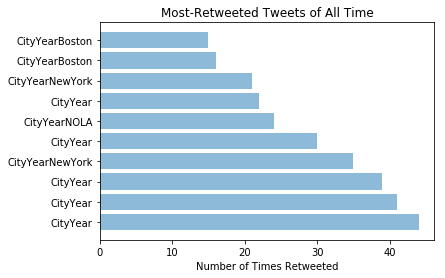

In [105]:
objects4 = top10retweets['twitter handle']
y_pos = np.arange(len(objects3))
performance4 = top10retweets['times retweeted']
 
plt.barh(y_pos, performance4, align='center', alpha=0.5)
plt.yticks(y_pos, objects4)
plt.xlabel('Number of Times Retweeted')
plt.title('Most-Retweeted Tweets of All Time')
 
plt.show()